In [36]:
# -*- coding: utf-8 -*
"""
利用朴素贝叶斯分类实现手写数字识别
比较不同模型的实现效果（高斯贝叶斯分类器、多项贝叶斯分类器、伯努利贝叶斯分类器）
"""
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, naive_bayes
from sklearn.metrics import accuracy_score

digits.keys() =  dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
digits.images.shape =  (1797, 8, 8)


<Figure size 432x288 with 0 Axes>

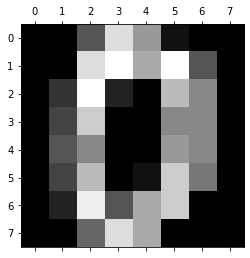

digits.data.shape =  (1797, 64)
digits.target.shape =  (1797,)


In [37]:
from sklearn.datasets import load_digits                     #导入手写数据集
digits = load_digits()
type(digits)                                                 #查看数据集的类型
print('digits.keys() = ',digits.keys())                      #查看digits包含的数据内容
print('digits.images.shape = ',digits.images.shape )         #imgaes 为一个三维矩阵，表示数据集图片
#print('digits.images = ',digits.images)                     #查看数据集图片大小
plt.gray()
plt.matshow(digits.images[0])
plt.show()
print('digits.data.shape = ',digits.data.shape)
#print('digits.data = ',digits.data)                         #图片像素数据
print('digits.target.shape = ',digits.target.shape)
#print('digits.target = ',digits.target)                     #图片标签
#print('digits.target_names = ',digits.target_names)         #数据集中所有标签值

In [38]:
#划分数据集
#形式一：
def load_data():
    digits = datasets.load_digits()
    return model_selection.train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
#形式二：
#from sklearn.model_selection import train_test_split
# 随机选取75%的数据作为训练样本；其余25%的数据作为测试样本
#X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0) 

In [33]:
#高斯贝叶斯分类器
def test_GaussianNB(*data):
    X_train, X_test, y_train, y_test = data
    cls = naive_bayes.GaussianNB()       #此处不指定prior，根据数据计算先验概率，在实例化时，可不对高斯朴素贝叶斯类输入参数
    cls.fit(X_train, y_train)            #实例化模型并训练模型，其中fit()过程就是在计算概率的过程
    print("*************GaussianNB Classifier***************")
    print('Training Score: %.3f' % cls.score(X_train, y_train))
    print('Test Score: %.3f' % cls.score(X_test, y_test))     # 使用模型自带的评估函数进行精确性测度
    print(X_test)
    pre_g = cls.predict(X_test)                              ##取每一个样本中概率最大的作为此样本的标签
    print(pre_g)
    accuracy_g = accuracy_score(y_test, pre_g)
    print('GaussianNB accuracy: %.3f' % accuracy_g)
X_train, X_test, y_train, y_test = load_data()
print(test_GaussianNB(X_train, X_test, y_train, y_test))
print('高斯模型主要用来处理连续型特征变量，使用此模型时需假定每一维特征都服从高斯分布，然后基于训练样本计算特征均值和标准差，从而得到此特征下每一个属性值的先验概率。')

*************GaussianNB Classifier***************
Training Score: 0.857
Test Score: 0.833
[[ 0.  0. 11. ... 13. 16.  8.]
 [ 0.  1. 15. ...  1.  0.  0.]
 [ 0.  2. 13. ... 16. 16.  3.]
 ...
 [ 0.  0. 11. ...  7.  0.  0.]
 [ 0.  0.  5. ...  7.  0.  0.]
 [ 0.  2. 14. ...  6.  0.  0.]]
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 3 6 7 9 0 0 5 8 6 3 0 2 3 4 1 9 8 6 8 8 8 3 5 1
 2 1 2 1 9 7 1 3 6 0 5 3 7 5 1 8 9 9 3 1 7 7 4 8 5 1 5 5 8 5 8 0 7 1 7 7 3
 4 8 9 7 7 8 1 6 5 8 5 5 4 1 7 0 6 8 5 8 1 1 5 9 9 5 7 5 6 8 8 6 7 6 1 5 1
 7 9 9 1 5 3 6 1 8 9 7 7 6 7 6 5 6 0 8 8 3 8 6 1 0 7 1 6 3 8 6 7 4 3 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 7 0 1 4 6 4 3 8 0 9 5 3 1 1 4 8 1 6 8 9 2 4
 9 3 7 6 8 3 3 1 6 9 8 6 3 1 2 0 7 6 1 1 8 7 1 7 1 5 5 7 5 3 8 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 1 6 8 8 8 4 6 7 5 2 1 7 3 8 4 6 9 4 5 7 3
 4 6 2 8 0 1 7 8 0 3 6 0 4 8 0 7 8 7 5 7 8 2 8 4 3 7 2 6 7 1 1 1 0 8 2 8 8
 5 6 8 3 7 8 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 

In [39]:
#多项贝叶斯分类器
def test_MultinomialNB(*data):
    X_train, X_test, y_train, y_test = data
    cls = naive_bayes.MultinomialNB()
    cls.fit(X_train, y_train)
    print("*************MultinomialNB Classifier***************")
    print('Training Score: %.3f' % cls.score(X_train, y_train))
    print('Test Score: %.3f' % cls.score(X_test, y_test))
    pre_m = cls.predict(X_test)
    accuracy_m = accuracy_score(y_test, pre_m)
    print('MultinomialNB accuracy: %.3f' % accuracy_m)
X_train, X_test, y_train, y_test = load_data()
print(test_MultinomialNB(X_train, X_test, y_train, y_test))
print('当特征为离散时，使用多项式模型。该模型在计算先验概率和条件概率时，会做一些平滑处理')

*************MultinomialNB Classifier***************
Training Score: 0.906
Test Score: 0.909
MultinomialNB accuracy: 0.909
None
当特征为离散时，使用多项式模型。该模型在计算先验概率和条件概率时，会做一些平滑处理


In [40]:
#伯努利贝叶斯分类器
def test_BernoulliNB(*data):
    X_train, X_test, y_train, y_test = data
    cls = naive_bayes.BernoulliNB()
    cls.fit(X_train, y_train)
    print("**************BernoulliNB Classifier***************")
    print('Training Score: %.3f' % cls.score(X_train, y_train))
    print('Test Score: %.3f' % cls.score(X_test, y_test))
    pre_b = cls.predict(X_test)
    accuracy_b = accuracy_score(y_test, pre_b)
    print('BernoulliNB accuracy: %.3f' % accuracy_b)
X_train, X_test, y_train, y_test = load_data()
print(test_BernoulliNB(X_train, X_test, y_train, y_test))
print('与多项式模型一样，伯努利模型适用于离散特征的情况，不同的是，伯努利模型中每个特征的取值只能是1和0')

**************BernoulliNB Classifier***************
Training Score: 0.867
Test Score: 0.851
BernoulliNB accuracy: 0.851
None
与多项式模型一样，伯努利模型适用于离散特征的情况，不同的是，伯努利模型中每个特征的取值只能是1和0


In [41]:
print('The best method is MultinomialNB Classifier, and its accuracy is 0.909')

The best method is MultinomialNB Classifier, and its accuracy is 0.909
